# NOMAD Data Reduction Tutorials, by Dan and Kate

If you have questions about these tutorials, you may contact me at: oldsdp@ornl.gov

If you have any complaints or especially difficult questions, you may contact me at: pagekl@ornl.gov

In [1]:
#this is just stuff to setup the enviornment and make the plots pretty.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from some_danfinitions import *


import warnings
warnings.filterwarnings('ignore')

%matplotlib notebook

num_colors = (6)
cm = plt.cm.get_cmap(name='inferno')
cc = [cm(1.*i/num_colors) for i in range(num_colors)]
mpl.rcParams['axes.color_cycle'] = cc


plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'font.family': 'Helvetica'})



### Demo 2: Generating the PDF from a merged S(Q) dataset 

In the last demo, we performed simple data reduction procedures by readining in 'raw' datasets, removing the background, and normalizing by Vanadium.  In practice, there are several other subtle but complex procedures (smoothing vanadium and stripping out peaks, applying absorption corrections, accounting for sample composition, ect.) we perform to generate the final, merged S(Q) dataset.  

In this demo, we will be taking some of the merged 'S(Q)' datasets from NOMAD, and converting them into PDFs.  

After this demo, we'll have a script to perform this transform for us.  For now, however, get ready for some Fourier Transforms!  

In [2]:
q, sq_Si = read_nomad_sq('SQ_files/NOM_9999_NIST_Si_SQ.dat') #let's start by reading in our old friend, NIST standard Si

reading from file SQ_files/NOM_9999_NIST_Si_SQ.dat


<IPython.core.display.Javascript object>


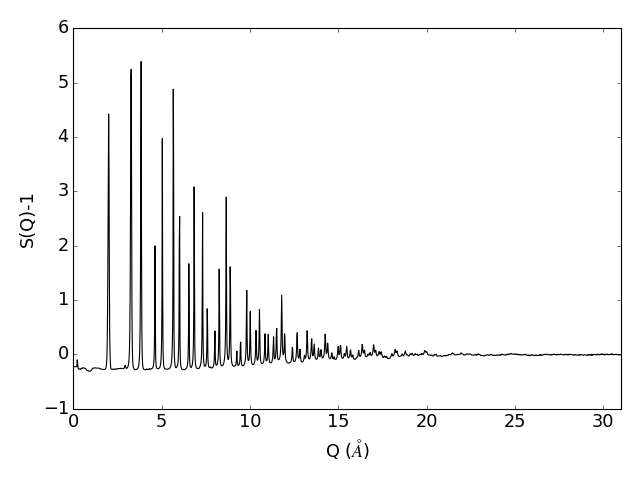

In [3]:
plt.figure()
plt.plot(q, sq_Si)
plt.axis([0,31,-1,6])
plt.xlabel('Q ($\AA$)')
plt.ylabel('S(Q)-1')
plt.tight_layout()

Although we have called the variable 'sq', the data is actually already in the format we refer to as $[S(Q) - 1]$.  You can tell this at a glance by looking at the high-Q behavior, which is seen to reach a limit of 0 (as opposed to the true '$S(Q)$', which terminates at 1.)

### Side Note:

Welcome to the world of total scattering! It seems every community has their own variation on what they call the 'PDF'. At NOMAD, what we refer to as the PDF is the definition laid out in the fantastic book by Takeshi Egami and Simon Billinge, 'Underneath the Bragg Peaks'. We call it the G(r) for short. Note, this is NOT the same definition of G(r) as is found in the also excellent paper by 2001 paper by David Keen, 'A comparison of various commonly used correlation functions for describing total scattering'.

### Back to the Action!

The PDF, hereafter referred to as G(r), is a sine-transform of $Q\times[S(Q)-1]$.  In this way, each peak in S(Q) can be thought of as contributing a proportional oscillation, with corresponding frequency, to the PDF.  The derivation is left to elsewhere, but may be simplified for our purposes to:

## $ G(r) =  \frac{1}{16 \pi} \sum\limits_{i=0}\limits^{Q_{max}} Q_i \times [S(Q_i)-1] \times \sin(r\times q)$

In this way, we may calculate the value for any r-value due to the merged S(Q) dataset.  So let's due that!  

In [4]:
r = np.linspace(0.0,20,401) #set r-values to span from 0.0 to 20, linearly spaced among 400 points such that delr = 0.05

In [5]:
gr_Si = np.zeros(len(r)) #define our G(r) variable 
for rvals in range(len(r)): #loop over r-values
    for qvals in range(len(q)): #for each r-value, loop over each Q-value
        gr_Si[rvals] += q[qvals]*sq_Si[qvals]*np.sin(r[rvals]*q[qvals]) #MATH
gr_Si = gr_Si / (16.0*np.pi) #tossing our constant back in there

<IPython.core.display.Javascript object>


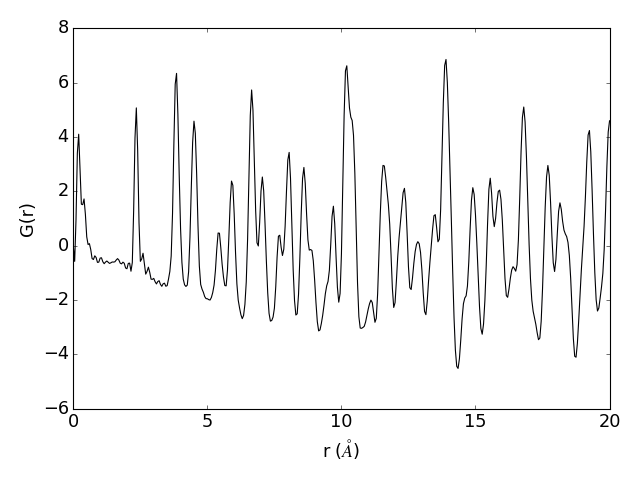

In [6]:
plt.figure()
plt.plot(r,gr_Si)
plt.xlabel('r ($\AA$)')
plt.ylabel('G(r)')
plt.tight_layout()

Not bad for our first time!  We'll learn about optimizing the factors that go into the PDF in the next demo, but for now, you can try calculating some of the other S(Q) available, or changing the bounds of the r-values used.  Be warned, if you go out to higher-r with the same spacing, the calculation will take a while. 

Here is one to get you started, BaTiO3

In [7]:
r2 = np.linspace(0,80,801)
q,sq = read_nomad_sq('SQ_files/NOM_9999_BaTiO3_SQ.dat')

gr2 = np.zeros(len(r2)) #define our G(r) variable 
for rvals in range(len(r2)): #loop over r-values
    for qvals in range(len(q)): #for each r-value, loop over each Q-value
        gr2[rvals] += q[qvals]*sq[qvals]*np.sin(r2[rvals]*q[qvals]) #MATH
gr2 = gr2 / (16.0*np.pi) #tossing our constant back in there

reading from file SQ_files/NOM_9999_BaTiO3_SQ.dat


<IPython.core.display.Javascript object>


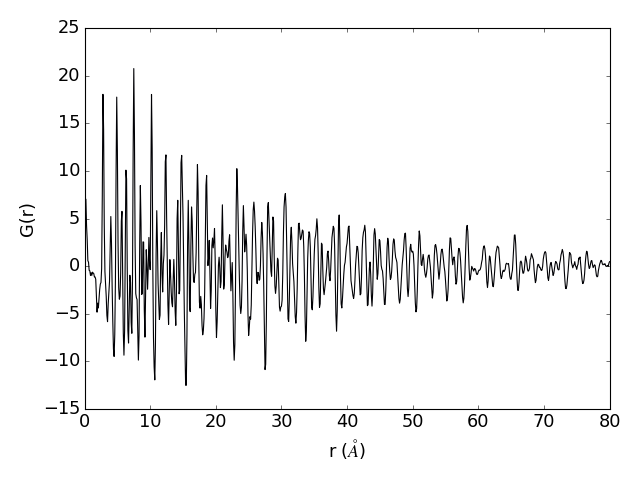

In [8]:
plt.figure()
plt.plot(r2, gr2)


plt.xlabel('r ($\AA$)')
plt.ylabel('G(r)')
plt.tight_layout()